Chapter 31  
# 从散点到概率密度
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [3]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris

In [4]:
# 从seaborn中导入鸢尾花样本数据
iris_sns = sns.load_dataset("iris") 

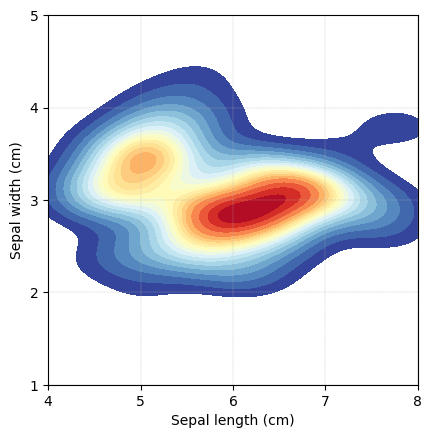

In [5]:
fig, ax = plt.subplots()

ax = sns.kdeplot(
    data=iris_sns, 
    x="sepal_length", 
    y="sepal_width", 
    fill=True,
    cmap = 'RdYlBu_r',
    n_levels = 20)

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
# 设置横纵轴标签

ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
# 设置横纵轴刻度

ax.axis('scaled')
# 设定横纵轴尺度1:1
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
# 增加刻度网格，颜色为浅灰 (0.8,0.8,0.8)

ax.set_xbound(lower = 4, upper = 8)
ax.set_ybound(lower = 1, upper = 5)
# 设置横纵轴取值范围

### 增加概率密度
《统计至简》第17章专门介绍概率密度估计 (Kernel Density Estimation, KDE)

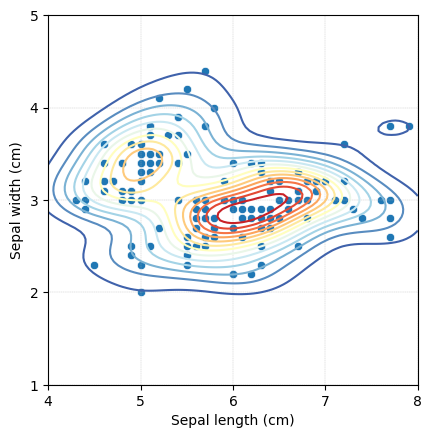

In [7]:
import scipy.stats as st

XX,YY = np.meshgrid(np.linspace(4, 8, 100),
                    np.linspace(1, 5, 100))
positions = np.vstack([XX.ravel(), YY.ravel()])
samples = iris_sns[['sepal_length','sepal_width']].to_numpy()
kernel = st.gaussian_kde(samples.T)

PDF_xy = np.reshape(kernel(positions).T, XX.shape)

fig, ax = plt.subplots()

ax = sns.scatterplot(data=iris_sns, 
                     x="sepal_length", 
                     y="sepal_width")

plt.contour(XX,YY,PDF_xy,levels = 15, cmap = 'RdYlBu_r')

# 利用 seaborn.scatterplot() 绘制散点图
# x对应横轴特征，鸢尾花数据帧列名 "sepal_length"
# y对应纵轴特征，鸢尾花数据帧列名 "sepal_width"

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
# 设置横纵轴标签

ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
# 设置横纵轴刻度

ax.axis('scaled')
# 设定横纵轴尺度1:1

ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
# 增加刻度网格，颜色为浅灰 (0.8,0.8,0.8)

ax.set_xbound(lower = 4, upper = 8)
ax.set_ybound(lower = 1, upper = 5)
# 设置横纵轴取值范围

In [10]:
### 用散点颜色代表概率密度

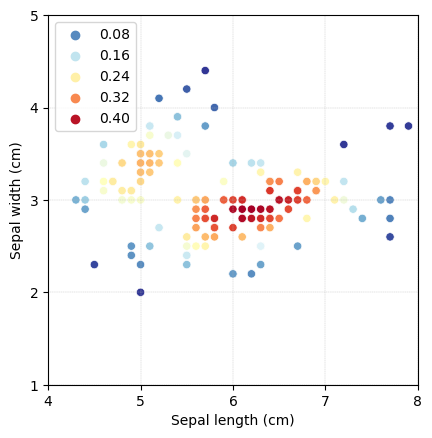

In [10]:
fig, ax = plt.subplots()

ax = sns.scatterplot(data=iris_sns, 
                     x="sepal_length", 
                     y="sepal_width",
                     hue = kernel(samples.T),
                     palette = 'RdYlBu_r')

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
# 设置横纵轴标签

ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
# 设置横纵轴刻度

ax.axis('scaled')
# 设定横纵轴尺度1:1
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
# 增加刻度网格，颜色为浅灰 (0.8,0.8,0.8)

ax.set_xbound(lower = 4, upper = 8)
ax.set_ybound(lower = 1, upper = 5)
# 设置横纵轴取值范围

### 使用自己定义的色谱

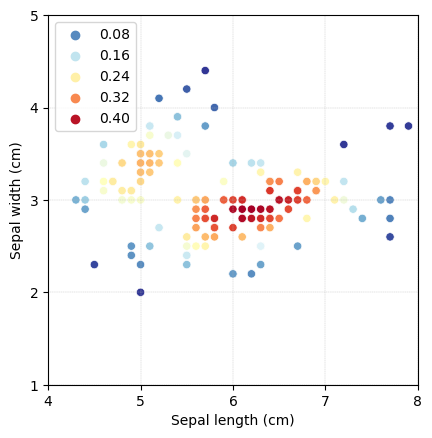

In [8]:
blues_cmap = sns.light_palette('#0091FE', as_cmap=True)
# 函数第一个输入为Hex色号
# 类似函数，seaborn.dark_palette()

fig, ax = plt.subplots()

ax = sns.kdeplot(
    data=iris_sns, 
    x="sepal_length", 
    y="sepal_width", 
    fill=True,
    cmap = blues_cmap,
    n_levels = 15)

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
# 设置横纵轴标签

ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
# 设置横纵轴刻度

ax.axis('scaled')
# 设定横纵轴尺度1:1
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
# 增加刻度网格，颜色为浅灰 (0.8,0.8,0.8)

ax.set_xbound(lower = 4, upper = 8)
ax.set_ybound(lower = 1, upper = 5)
# 设置横纵轴取值范围


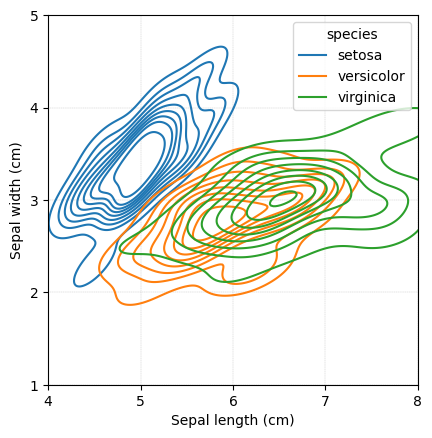

In [9]:
fig, ax = plt.subplots()

ax = sns.kdeplot(
    data=iris_sns, 
    x="sepal_length", 
    y="sepal_width", 
    hue = "species",
    fill=False,
    n_levels = 10)

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
# 设置横纵轴标签

ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))
# 设置横纵轴刻度

ax.axis('scaled')
# 设定横纵轴尺度1:1
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
# 增加刻度网格，颜色为浅灰 (0.8,0.8,0.8)

ax.set_xbound(lower = 4, upper = 8)
ax.set_ybound(lower = 1, upper = 5)
# 设置横纵轴取值范围

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023